# FINAL SCRIPT FOR OBJECT RECOGNITION TESTING

## Calibration

Change the following cell's type to Code to run Calibration

import kinect_vision as kv
from image_processing import run_calibration, run_calibration_rgb
from matplotlib import pyplot as plt

import os
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR
#%matplotlib inline
import numpy as np
import cv2
calibrate_check1 = raw_input("Prepared for Empty Capture?: ")
if calibrate_check1 == "yes":
    print "empty"
    empt = kv.capture_frames()
    plt.imshow(empt['ir'])
    plt.show()
    empt_all = kv.prepare_im_array(empt)
    rgb, depth, ir = empt_all
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_empty_FINAL'), rgb=rgb, depth=depth, ir=ir)

calibrate_check2 = raw_input("Prepared for Calibrate Capture?: ")
if calibrate_check2 == "yes":
    cali = kv.capture_frames()
    print "cali"
    cali_all = kv.prepare_im_array(cali)
    rgb, depth, ir = cali_all
    
    np.savez(os.path.join(PATH_TO_KINECT_IMAGES_DIR, 'im_array_cal_FINAL'), rgb=rgb, depth=depth, ir=ir)

# Prepare Calibration data for image processing

In [1]:
import copy

import cv2
from matplotlib import pyplot as plt
from object_data_csv import create_object_df, prepare_object_dict, add_to_csv, create_csv

##################################### Vision Imports ###########################################
import numpy as np
import os
import vision_tools as vt
from vision_tools import normclean2cv2
import kinect_vision as kv
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR
from image_processing import run_calibration, run_calibration_rgb
from image_processing import run_image_processing_v2_depth, run_image_processing_v2_rgb

from tableObject_class import TableObject, match_rgb_with_depth, match_rgb_with_depth_v2


##################### Vision Initialise #####################################
directory = PATH_TO_KINECT_IMAGES_DIR

cali = kv.load_npz_as_array("im_array_cal_FINAL", directory)
empt = kv.load_npz_as_array("im_array_empty_FINAL", directory)

empt_all = kv.prepare_im_array(empt)
cali_all = kv.prepare_im_array(cali)

depth_cali = run_calibration(empt_all, cali_all, adjust=False)
rgb_cali = run_calibration_rgb(empt_all, cali_all, depth_cali, adjust=False)


{'radius': [8, 16], 'thresh': [85, 100]}
21
All Calibration points found
{'radius': [5, 8], 'thresh': [85, 220]}
22
All Calibration points found
(174, 198)


# Take Picture

In [2]:
while(1):
    capture_check = raw_input("Ready?: ")
    if capture_check == "yes":
        test = kv.capture_frames()
        test_all = kv.prepare_im_array(test)
        break

######## Process Test Image and Retrieve Depth and Contour Information from Depth and RGB Data ##########

rgb, depth, ir = test_all


normclean, sorted_family = run_image_processing_v2_depth(test_all, 
                                                         depth_cali, 
                                                         show=False)

rgbnormclean, rgb_family, test_rgbx_img = run_image_processing_v2_rgb(test_all, 
                                                                      rgb_cali, 
                                                                      depth_cali, 
                                                                      show=False)

######## Clean the images and convert them so that they are cv2 compatible ############

depth_normclean = normclean2cv2(normclean)
rgb_normclean = normclean2cv2(rgbnormclean)

#
test_rgb_img = vt.convert2rgb(test_rgbx_img)

cv2.imwrite("test_rgb_img.jpg", test_rgb_img)

####### Create List of Objects and match the rgb and depth data ##########
# Note that the label here is False which means that depth profiles will be overlaid with their 
# rgb counterparts objects will be labelled based on their spatial distances

object_list = match_rgb_with_depth_v2(sorted_family, rgb_family, depth_normclean, test_rgb_img, label=False)



#cv2.imwrite("test_rgb_img.jpg", test_rgb_img)
cv2.imwrite("depth_normclean.jpg", depth_normclean)

Ready?: yes
[1]
[3]
[5]
[7]
Depth Done
(174, 198)
[1]
[3]
[5, 6]
[8]
[10, 11, 12, 13]
Making depth List ...
1
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
3
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
5
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
7
RGB data not considered
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'rgb_box'",)
Making rgb object list...
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of type AttributeError occurred. Arguments:
("'TableObject' object has no attribute 'box'",)
item
Depth data not implemented
An exception of typ

True

# Do Object Recognition

In [3]:
import object_recognition_tools as ort

excluded_val = ['centre', 'rgb_centre', 'number of children']
extras = ['R','G','B', 'centre_offset']

obj_features_mean, obj_features_std = ort.prepare_obj_features_param(obj_feat_csv = 'object_features.csv', 
                                                                 excluded_val = excluded_val, 
                                                                 extras=extras)

rec_df = ort.prepare_pick_obj_features_param(object_list, excluded_val, extras)
rec_df

1
2
3
4
5


,name,area,aspect,circularness,fill,rgb_area,rgb_aspect,rgb_circularness,rgb_fill,median_height,mean_height,R,G,B,centre_offset
0,Unknown,621.0,0.931791,0.828761,0.784091,1594.0,0.604563,0.366540,0.544771,0.118307,0.123543,164.503853,142.541790,145.520451,18.865844
1,Unknown,1154.5,0.860465,0.602189,0.725644,1303.0,0.709613,0.411361,0.621068,0.139188,0.164614,201.771408,197.440493,204.213353,5.700877
2,Unknown,1831.0,0.921218,0.920923,0.802366,2306.5,1.000000,0.937196,0.821111,0.269969,0.239082,153.975692,144.150880,153.950545,1.899770
3,Unknown,519.0,0.961538,0.863793,0.798462,876.0,0.969697,0.914658,0.829545,0.177476,0.179804,184.482162,126.240000,193.544865,1.294043
4,Unknown,NaN,0.962963,0.916942,0.825142,2317.0,0.962963,0.916942,0.825142,0.000000,0.000000,191.778056,202.244889,199.183146,0.000000


In [4]:
cost_list = ort.create_cost_list(obj_features_mean, obj_features_std, rec_df)
#cost_list

{'1': <tableObject_class.TableObject object at 0x7f2b30abbd10>, '3': <tableObject_class.TableObject object at 0x7f2b30abbd50>, '2': <tableObject_class.TableObject object at 0x7f2b3f3b9e90>, '5': <tableObject_class.TableObject object at 0x7f2b30abbdd0>, '4': <tableObject_class.TableObject object at 0x7f2b30abbd90>}
Index([u'measure', u'mug'], dtype='object', name=u'name')
NAME:  measure
item


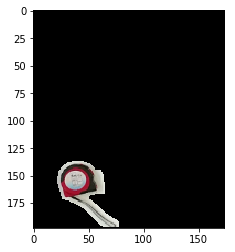

Index([u'mug', u'book'], dtype='object', name=u'name')
NAME:  mug
item


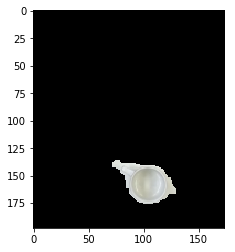

Index([u'tape', u'mug'], dtype='object', name=u'name')
NAME:  tape
item


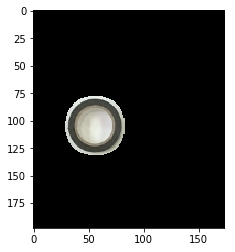

Index([u'ball', u'mug'], dtype='object', name=u'name')
NAME:  ball
item


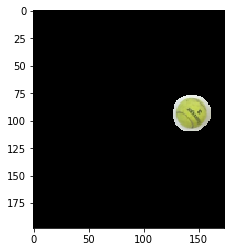

Index([u'cd', u'mug'], dtype='object', name=u'name')
NAME:  cd
item


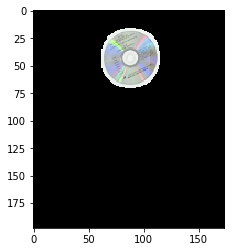

In [12]:
def label_object_list(original_obj_list, cost_list, image, show=False):
    object_list = copy.copy(original_obj_list)
    print object_list.keys()
    for i,item in enumerate(sorted(object_list.keys())):
        print cost_list[i].keys()[0:2]
        print "NAME: ", cost_list[i].keys()[0]
        object_list[item].label_object(image, name=cost_list[i].keys()[0], show=show)
    return object_list

new4=ort.label_object_list(object_list, cost_list, test_rgb_img, show=True)
    

In [9]:
#new3_object_list = ort.label_object_list(object_list, cost_list, test_rgb_img, show=True)

In [11]:
new4['1'].name

'measure'